<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/Dianthus_ratio_fitting_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dianthus Binding Analysis Tool (Bidirectional Signal) - Robust Version
Upload your Excel file with:
   • Column A: Concentration in nM
   • Column B: Ratio values (can increase or decrease)
   • Zero concentrations will be automatically handled


Saving Triaged_expt_150447_minimal_set.xlsx to Triaged_expt_150447_minimal_set.xlsx
File 'Triaged_expt_150447_minimal_set.xlsx' uploaded successfully!
File structure preview:
   Rows: 21
   Columns: [15129.333333333332, 0.9735860447339066]

First few rows:
   15129.333333  0.973586    
0   5043.111111      1.016241
1   1681.037037      1.061767
2    560.345679      1.086621
3    186.781893      1.100743
4     62.260631      1.112849

Found 1 column pairs:
   Pair 0: 15129.333333333332 (conc nM) & 0.9735860447339066 (ratio)

Analysis plan:
   Pairs to fit: [0]
   Pairs to plot as scatter: []

Pair 0 data summary:
   Data points: 21
   Concentration range: 0.0 - 45388.0 nM
   Ratio range: 0.939 - 1.121

Fitting 1 pairs...

--- Analyzing Pair 0 ---
   Signal direction: Decreases with concentration
   Fitted One site (decrease) (k=3) — R²=0.7961, AIC=-153.32
   Fitted One site + non-specific (k=4) — R²=0.7968, AIC=-151.40
   Fitted Hill equation (k=4) — R²=0.8065, AIC=-152.43

   Model com

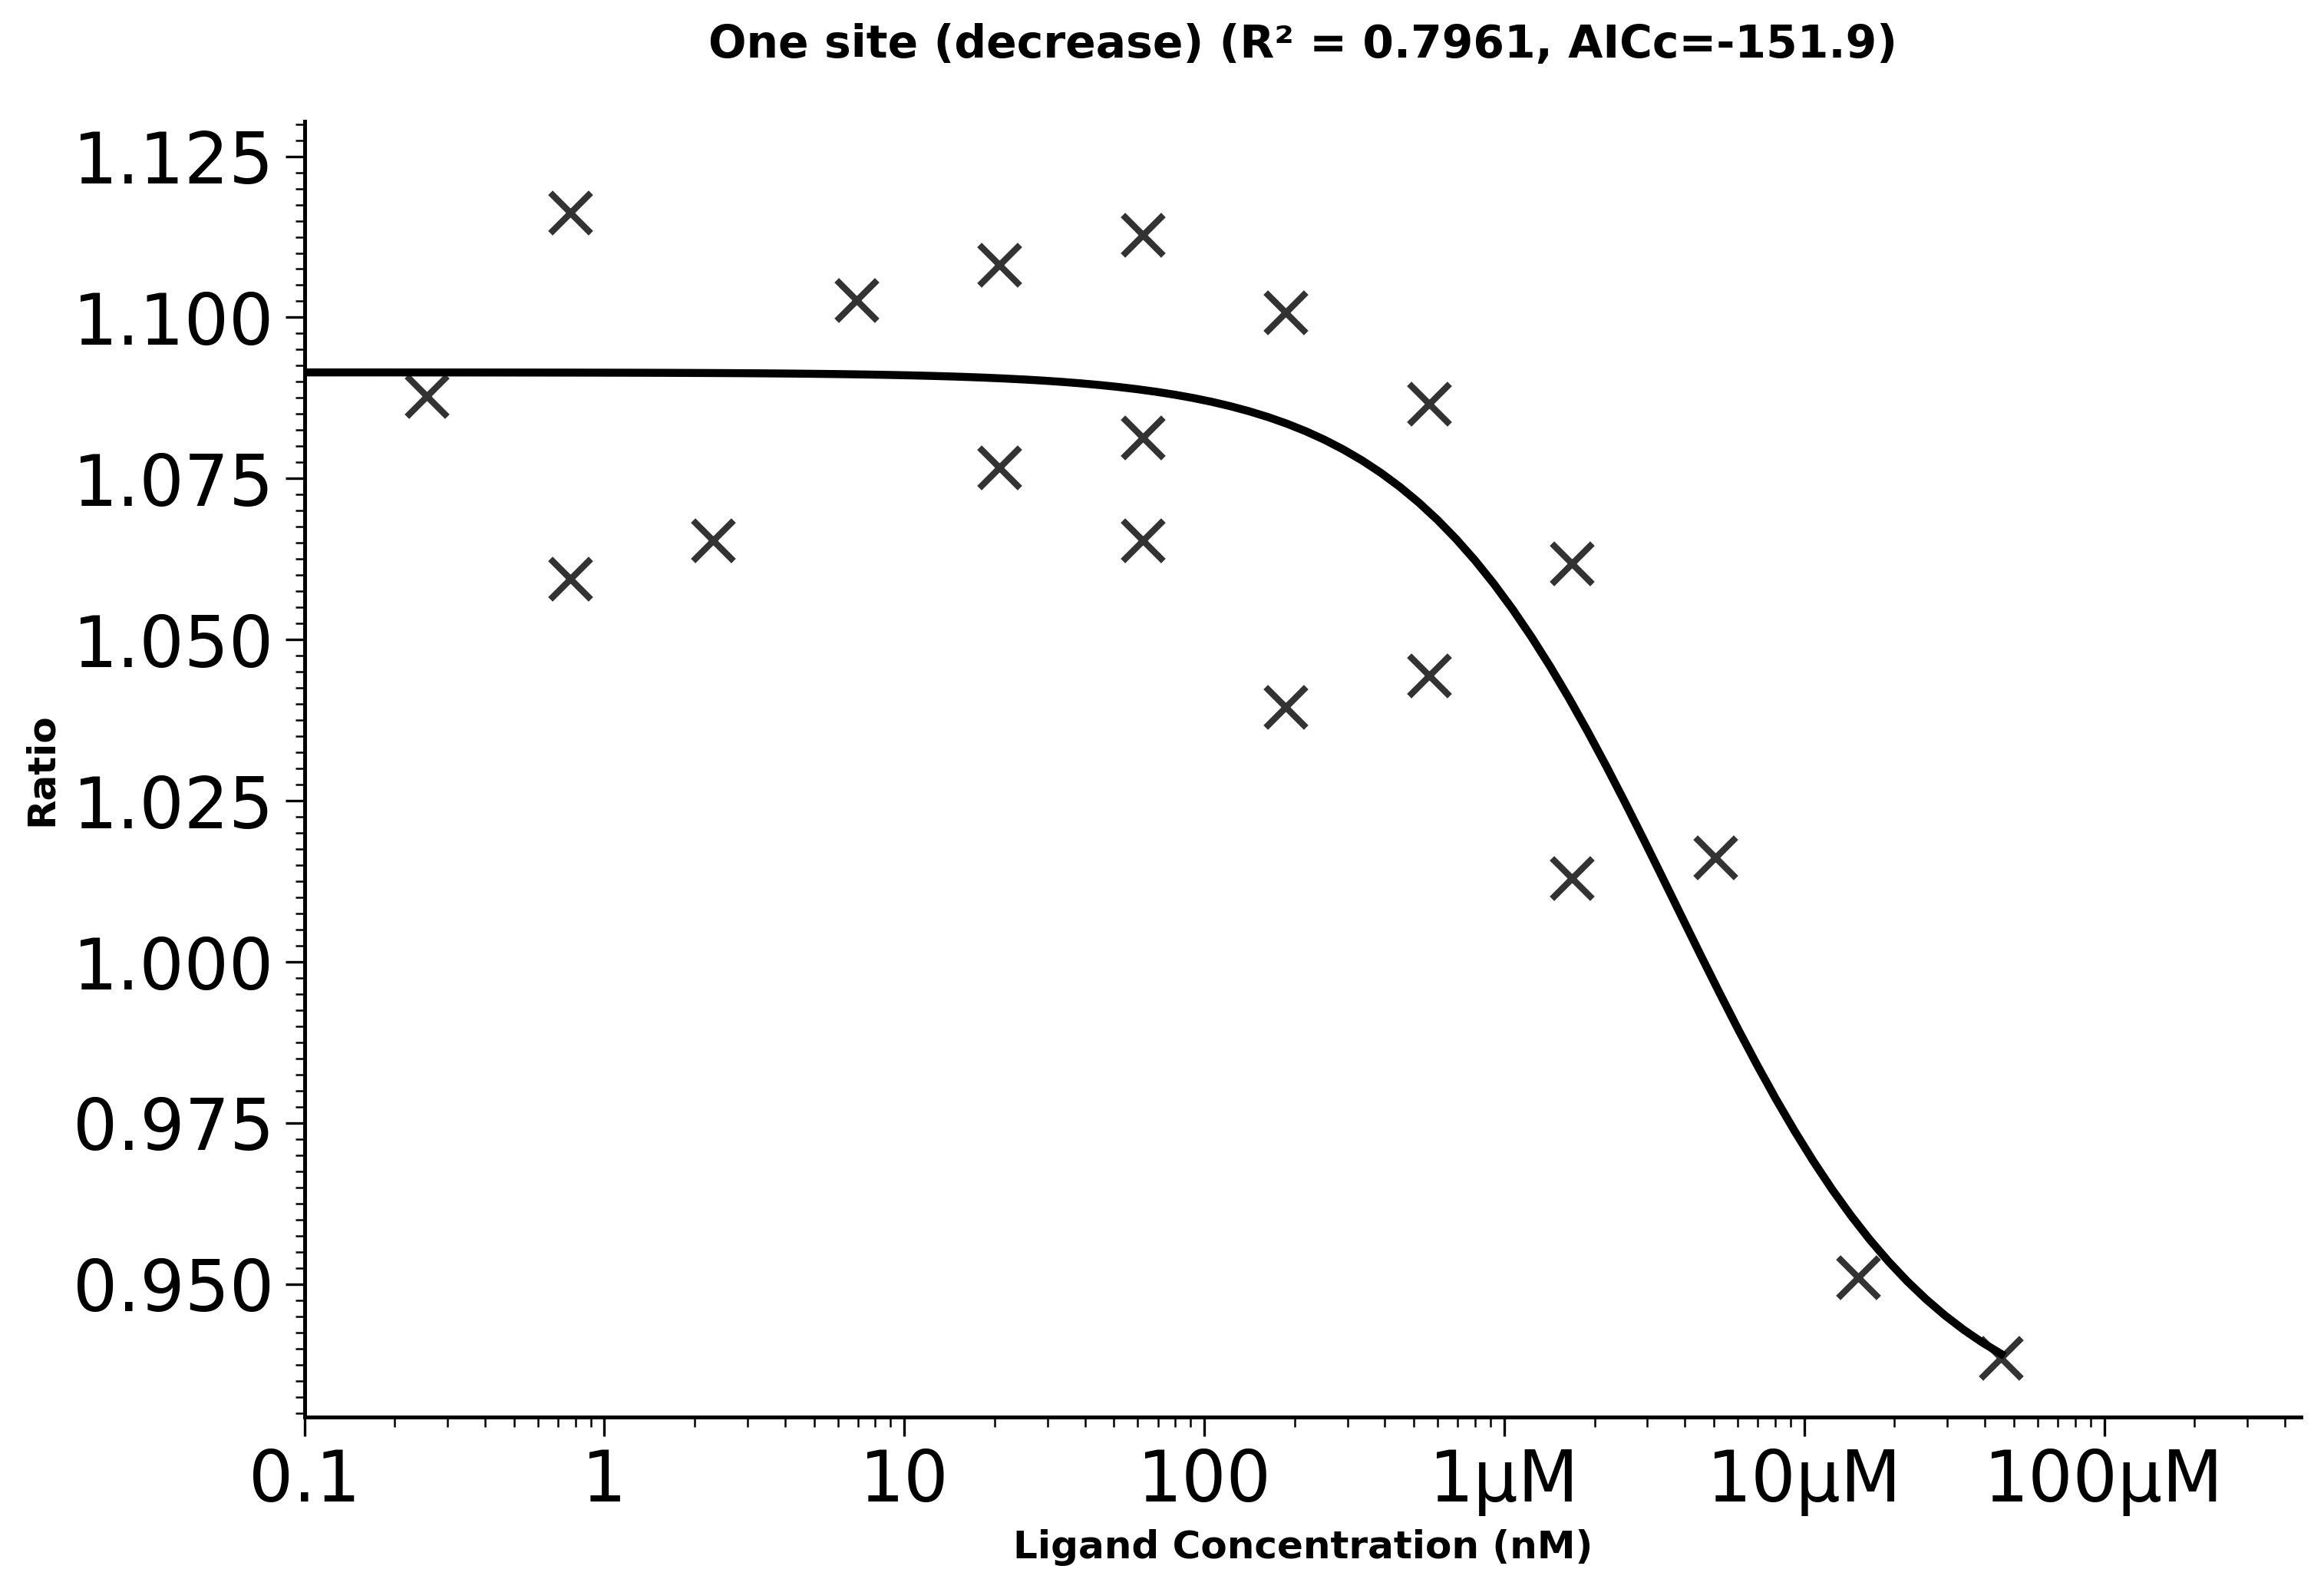


One site (decrease):
   Equation: Y = Top - (Top-Bottom)*X/(Kd+X)
   R²: 0.7961
   AICc: -151.91
   AIC: -153.32
   Kd: 3.714e-06 M (3714.1 nM)
   Standard Error: ± 1.985e-06 M (± 1985.2 nM)
   90% CI: (448.4 - 6979.7 nM)
   95% CI: <detection limit - 7605.0 nM (lower bound negative)
       Publication format: Kd = 3714 nM (95% CI: below detection limit to 7605 nM)
   Relative error: 53.5% (POOR)
--------------------------------------------------
Saved: Dianthus_binding_One_site_plus_non-specific_pair0.png


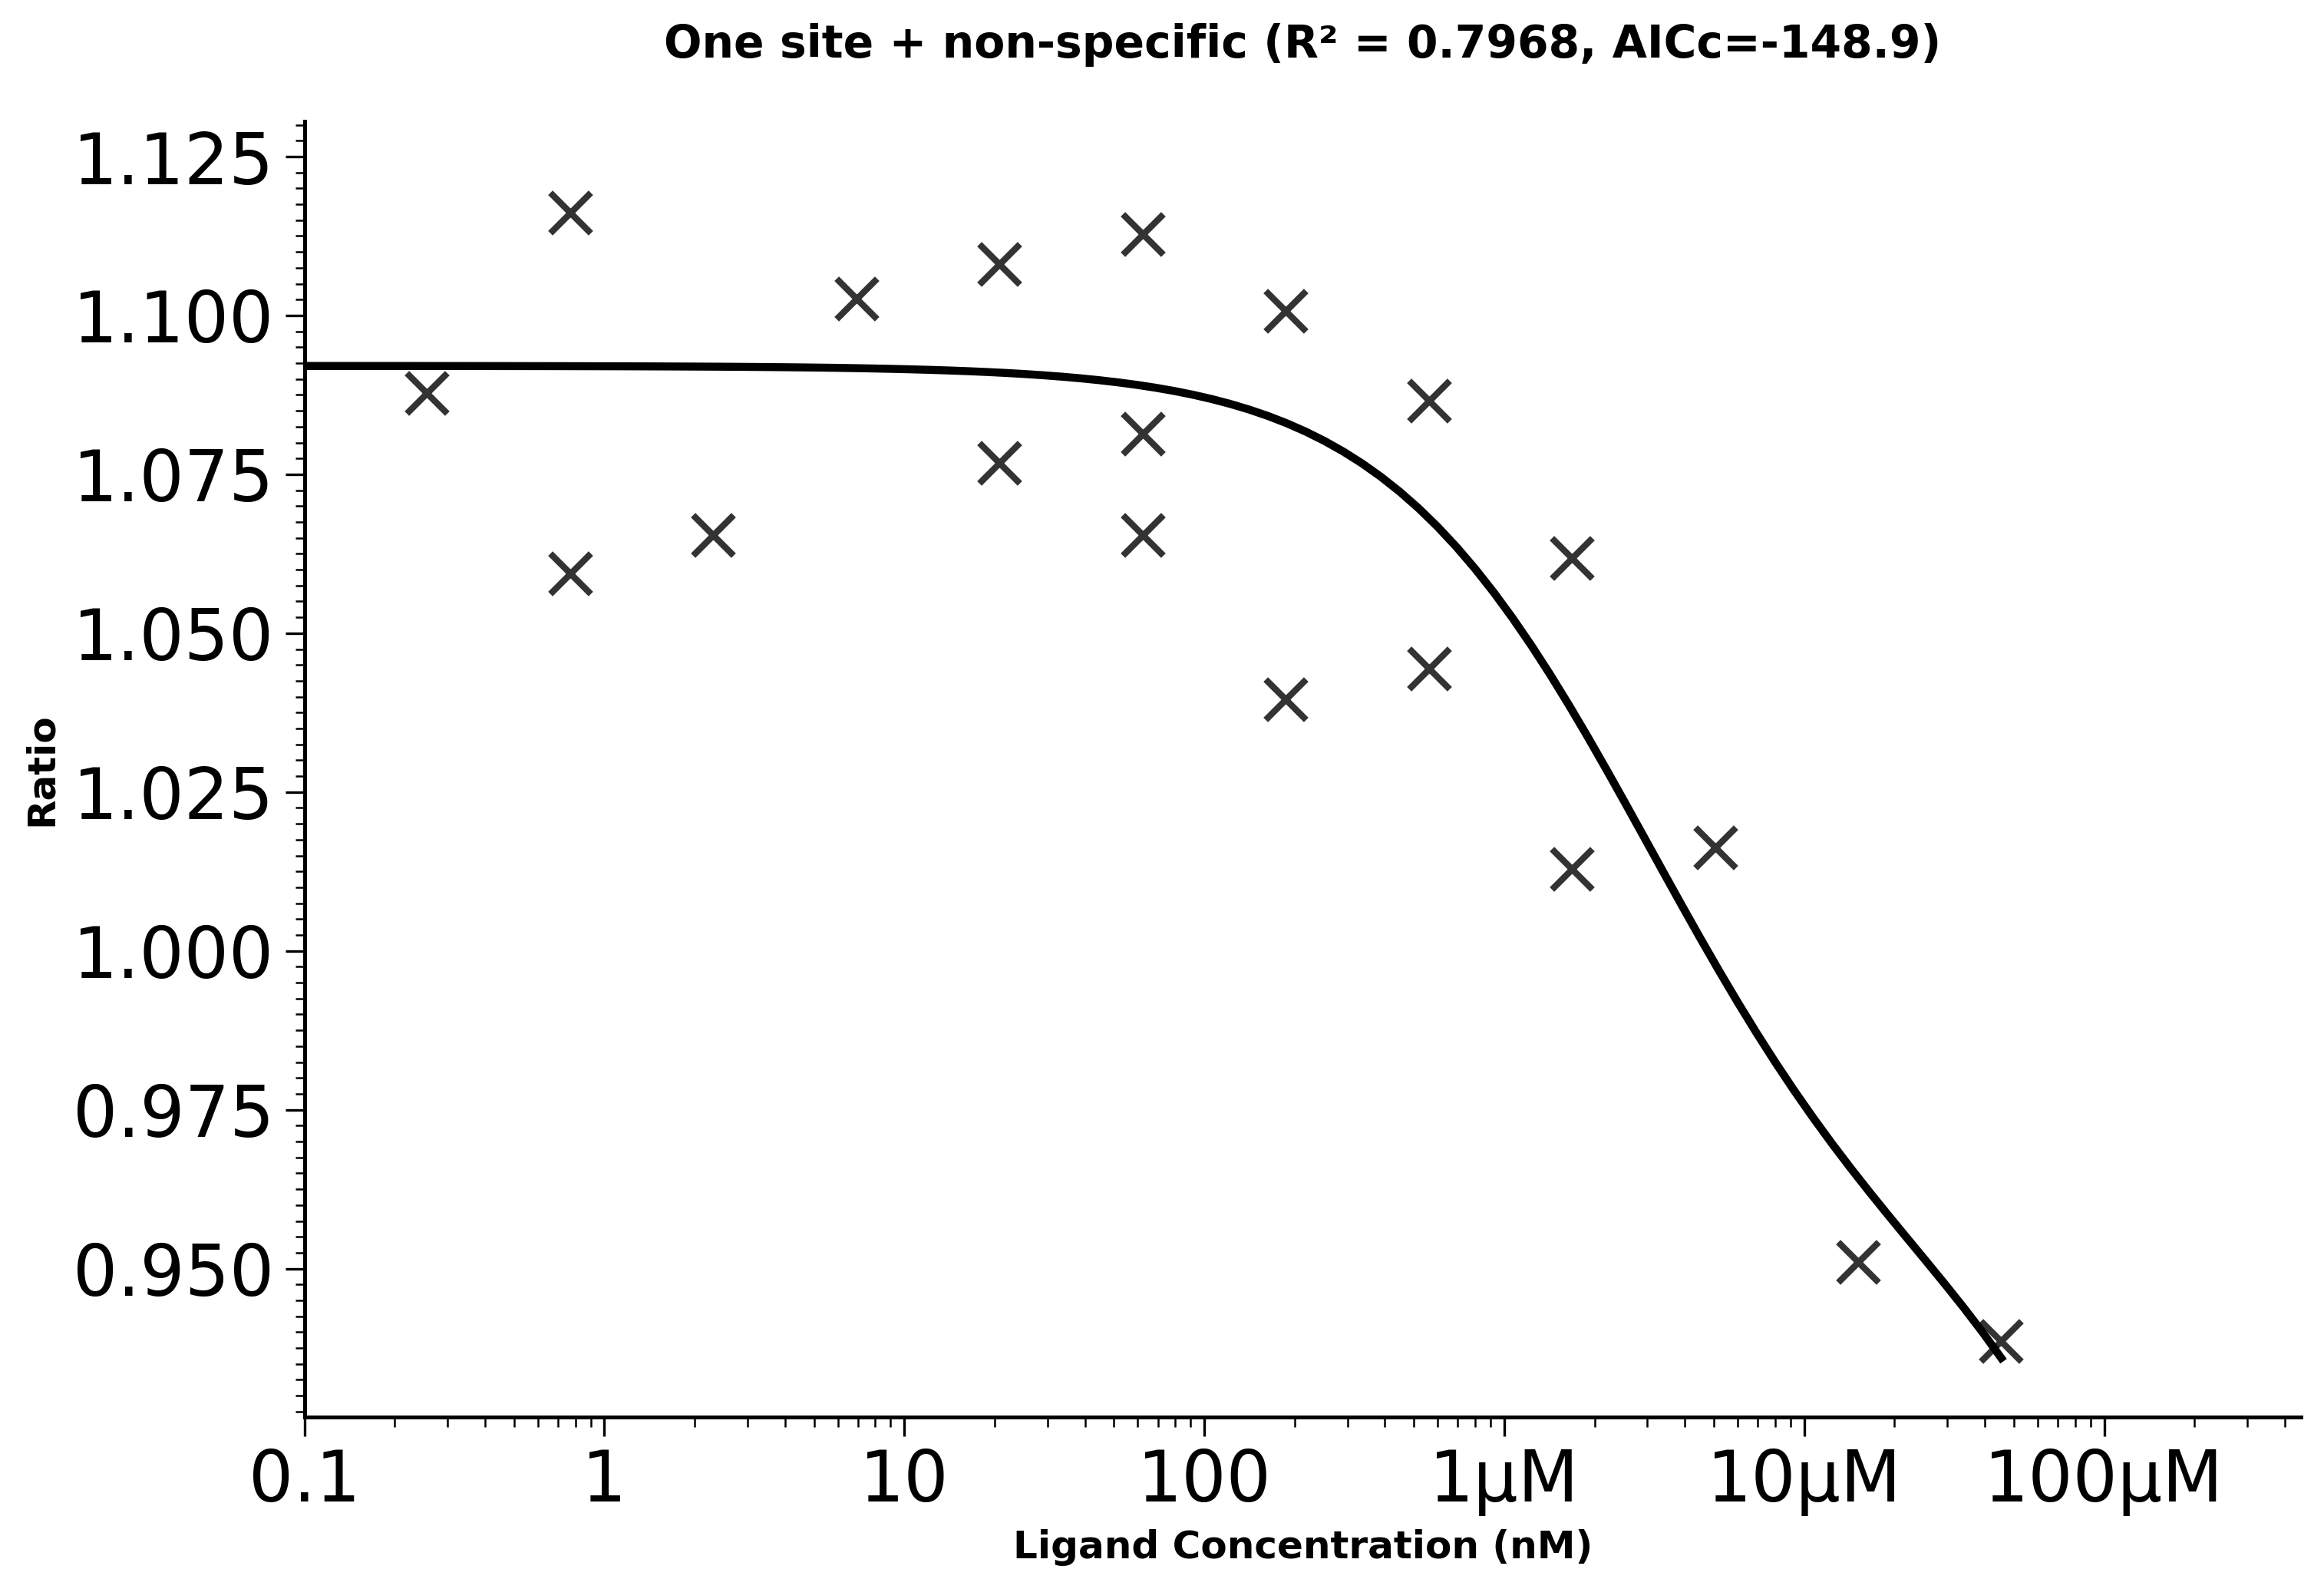


One site + non-specific:
   Equation: Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X
   R²: 0.7968
   AICc: -148.90
   AIC: -151.40
   Kd: 2.831e-06 M (2831.3 nM)
   Standard Error: ± 2.725e-06 M (± 2725.4 nM)
   90% CI: <detection limit - 7314.5 nM (lower bound negative)
   95% CI: <detection limit - 8173.0 nM (lower bound negative)
       Publication format: Kd = 2831 nM (95% CI: below detection limit to 8173 nM)
   Relative error: 96.3% (POOR)
--------------------------------------------------
Saved: Dianthus_binding_Hill_equation_pair0.png


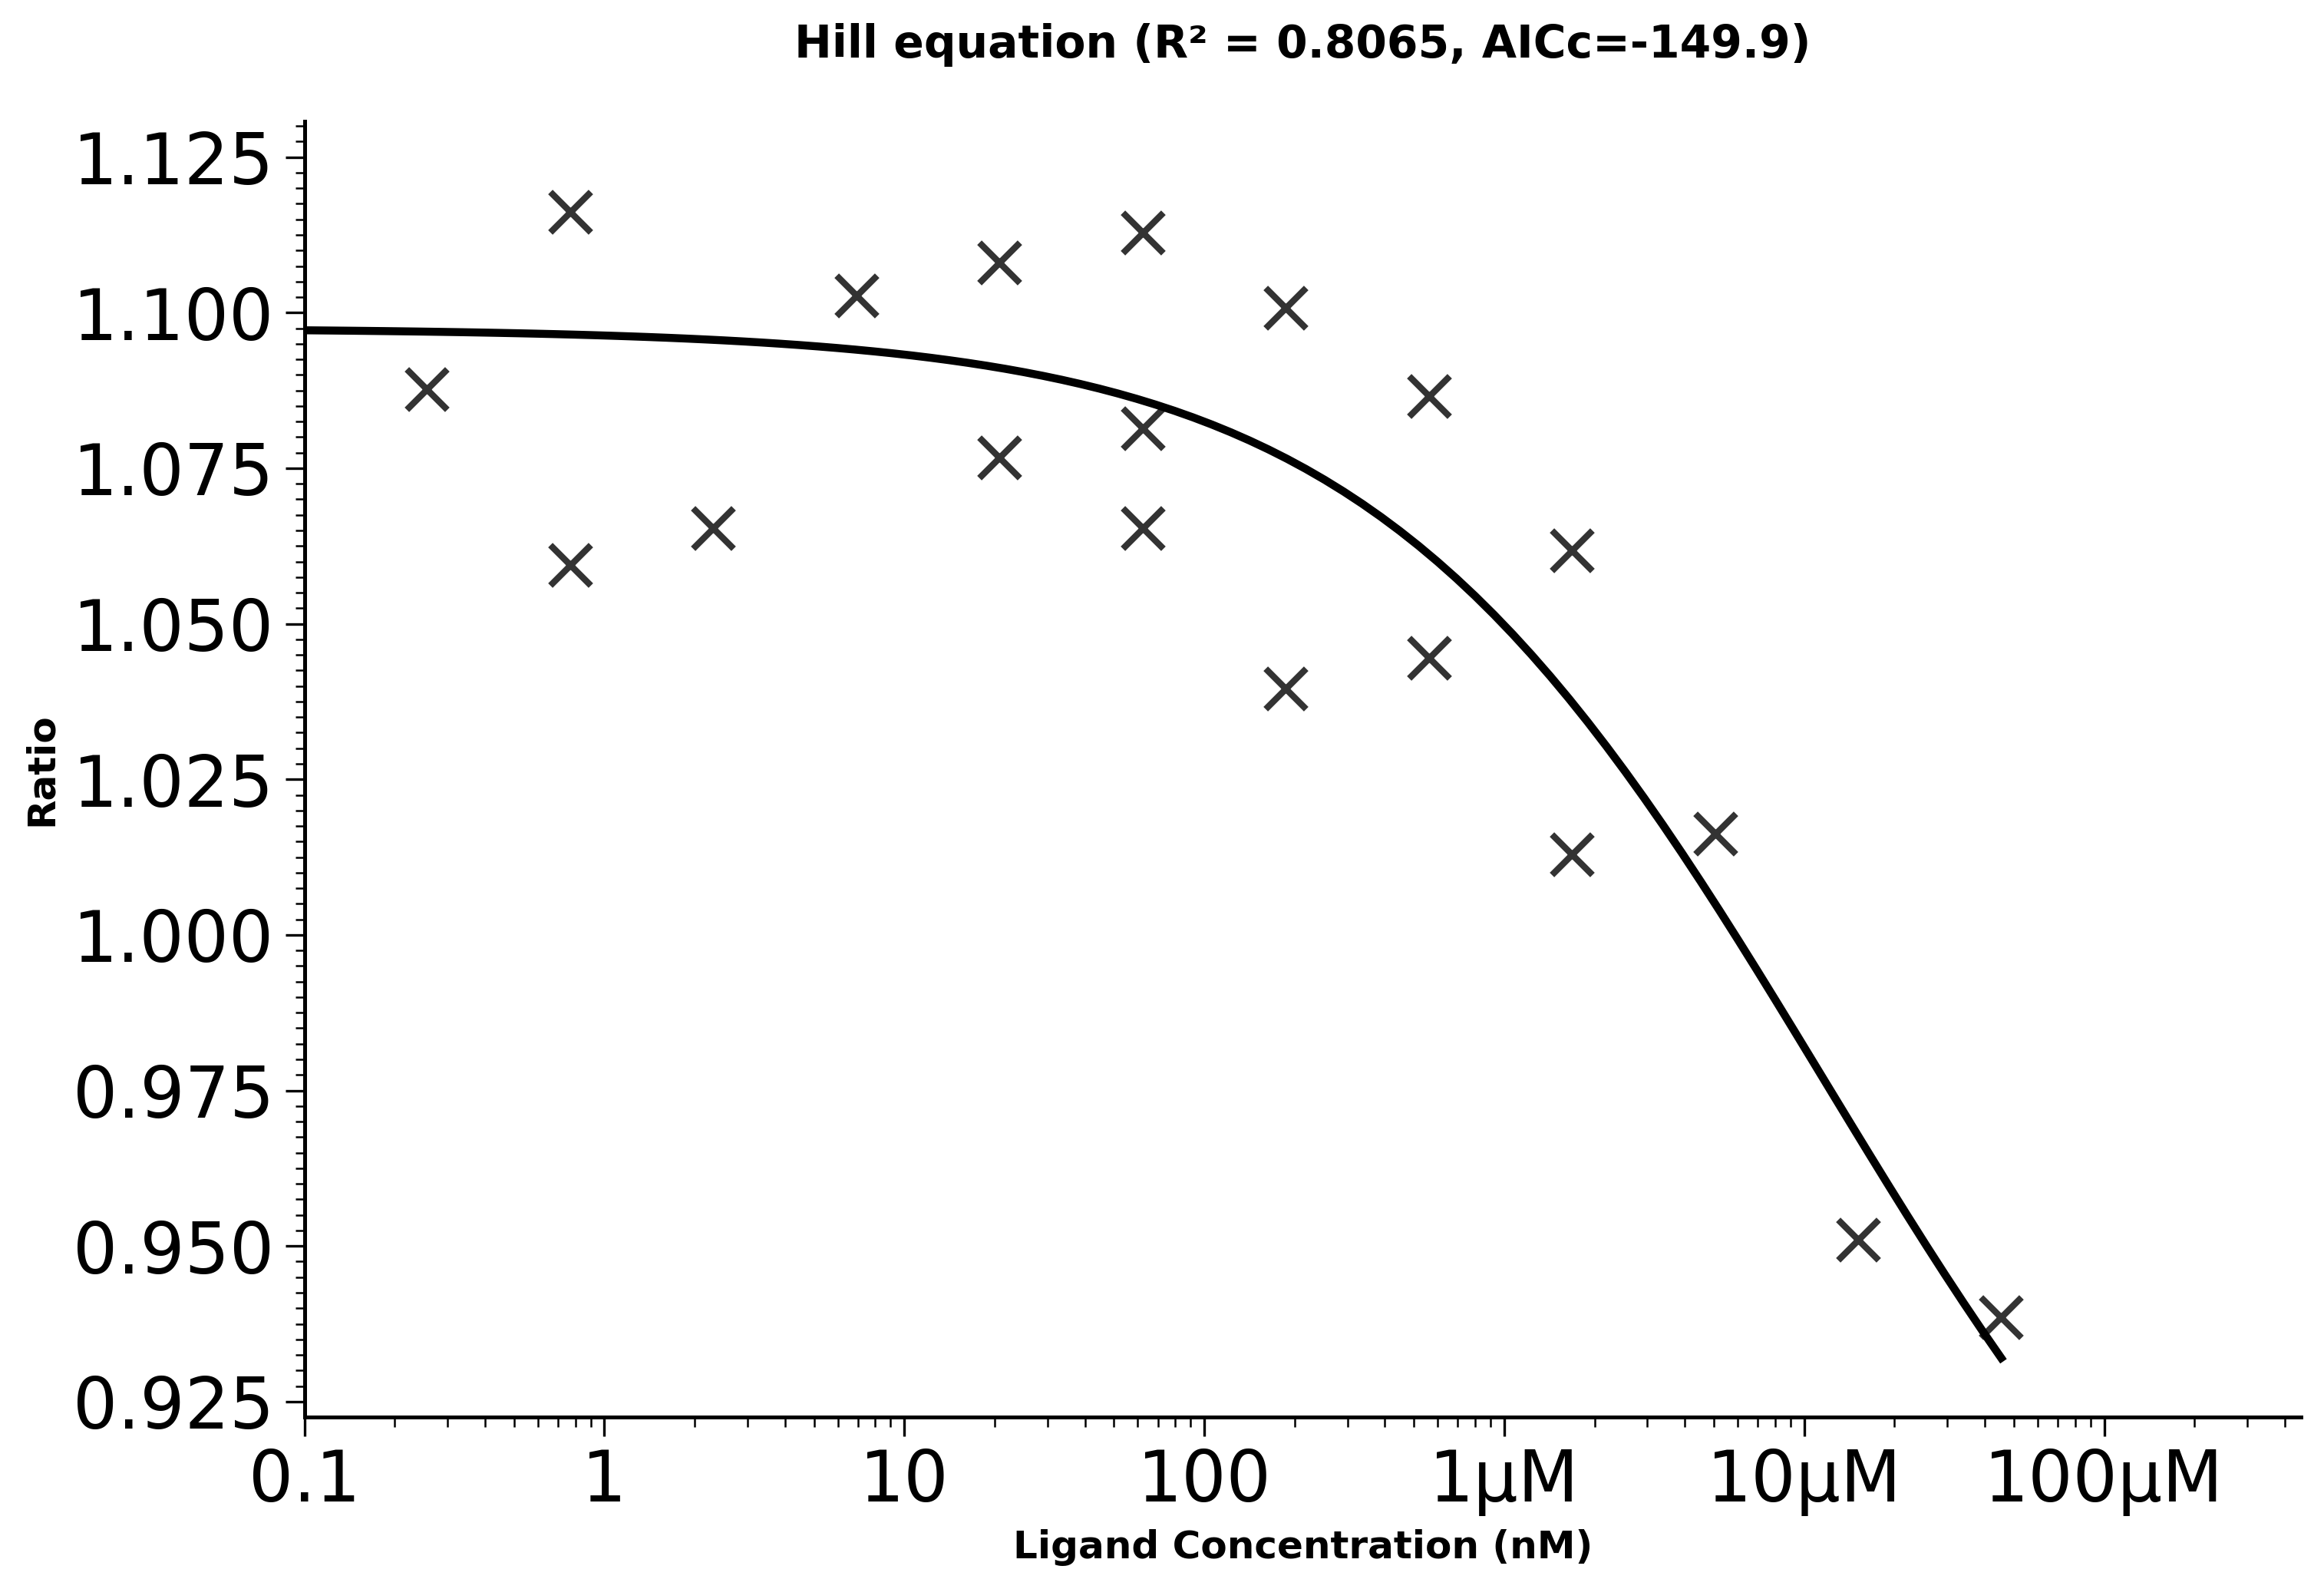


Hill equation:
   Equation: Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n)
   R²: 0.8065
   AICc: -149.93
   AIC: -152.43
   Kd: 1.168e-05 M (11682.3 nM)
   Standard Error: ± 3.184e-05 M (± 31838.0 nM)
   90% CI: <detection limit - 64055.9 nM (lower bound negative)
   95% CI: <detection limit - 74084.9 nM (lower bound negative)
       Publication format: Kd = 11682 nM (95% CI: below detection limit to 74085 nM)
   Relative error: 272.5% (POOR)
--------------------------------------------------

All model plots saved for Dianthus binding analysis.


In [1]:
"""
Dianthus Binding Assay Analysis Script (Bidirectional Signal) - Robust Version
===============================================================================

Author: Claude (Anthropic) with ChatGPT5 robustness improvements
Version: 3.0
Date: 2025

OVERVIEW:
This script analyzes Dianthus binding assay data where the signal can either increase
or decrease upon ligand binding. Unlike TRIC assays, this modality allows for both
positive and negative signal changes depending on the binding mechanism.

INPUT DATA FORMAT:
- Excel files with paired columns: (A,B), (C,D), (E,F), etc.
- Column pattern: Concentration (nM), Ratio values
- Ratio can increase or decrease from baseline upon binding

MATHEMATICAL MODELS AND FITTING ALGORITHM:
================================================================================

BINDING MODELS TESTED:
1. ONE SITE BINDING (Increase):
   Y = Bottom + (Top - Bottom) × X/(Kd + X)
   For signals that increase with binding concentration

2. ONE SITE BINDING (Decrease):
   Y = Top - (Top - Bottom) × X/(Kd + X)
   For signals that decrease with binding concentration

3. ONE SITE BINDING WITH NON-SPECIFIC:
   Y = Bottom + (Top - Bottom) × X/(Kd + X) + NS × X
   Includes linear non-specific component

4. HILL EQUATION (Bidirectional):
   Y = Bottom + (Top - Bottom) / (1 + (Kd/X)^n)
   Can handle both increases and decreases with Hill coefficient

FITTING ALGORITHM DETAILS:
================================================================================
Algorithm: Levenberg-Marquardt (LM) non-linear least squares optimization
Implementation: SciPy curve_fit function

The Levenberg-Marquardt algorithm combines:
- Gauss-Newton method: Fast convergence near the solution
- Gradient descent: Stable convergence far from solution
- Adaptive damping parameter (λ) that adjusts during iteration

Optimization Process:
1. Initial parameter estimates generated from data characteristics
2. Zero/negative concentrations safely handled (dropped or clamped)
3. Iterative parameter adjustment to minimize sum of squared residuals
4. Parameter bounds enforced to ensure physically meaningful results
5. Maximum 5000 iterations allowed for convergence
6. Covariance matrix calculated from Jacobian at convergence

MODEL SELECTION:
================================================================================
Primary: AICc (corrected Akaike Information Criterion) for small samples
Fallback: AIC (Akaike Information Criterion)
Final fallback: R² (coefficient of determination)

AICc = AIC + 2k(k+1)/(n-k-1) where:
- n = number of data points
- k = number of parameters
- Penalizes overfitting more heavily than R² alone

ERROR ANALYSIS AND STATISTICS:
================================================================================
Parameter Standard Errors:
- Calculated as √(diagonal elements of covariance matrix)
- Robust handling of ill-conditioned covariance matrices
- NaN values returned when covariance is invalid
- Bootstrap option available for non-parametric confidence intervals

Confidence Intervals:
- 90% CI: parameter ± 1.645 × standard_error
- 95% CI: parameter ± 1.96 × standard_error
- Negative bounds reported as "<detection limit"
- Based on normal distribution assumption (bootstrap available as alternative)

ROBUSTNESS IMPROVEMENTS:
================================================================================
- Zero/negative concentration handling with multiple strategies
- Graceful degradation when covariance matrix is singular
- Comprehensive exception handling with meaningful error messages
- Automatic fallback between model selection criteria
- Safe parameter error calculation with bounds checking

LIMITATIONS AND WARNINGS:
================================================================================
- Negative confidence interval bounds indicate poor parameter identifiability
- High relative errors (>30%) suggest insufficient data quality or range
- Parameter correlation can lead to unreliable individual parameter estimates
- Assumes homoscedastic (constant variance) residuals
- Large confidence intervals may require log-normal distribution assumptions

RECOMMENDED DATA QUALITY CRITERIA:
- Signal change >20% for reliable fitting
- Concentration range spanning 0.1× to 10× the expected Kd
- Clear baseline and saturation plateaus
- Signal-to-noise ratio >3:1
- Minimum 8-10 data points across the binding curve

================================================================================
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sys
import traceback
from google.colab import files
import numpy.random as npr

# Set minimalist plotting style with Helvetica font
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],
    'axes.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'axes.grid': False,
    'figure.facecolor': 'none',
    'axes.facecolor': 'none'
})

# Robust helper functions
def safe_param_errors(pcov):
    """Return parameter standard errors, handling invalid pcov gracefully."""
    if pcov is None:
        return None
    try:
        # pcov sometimes has negative or inf diag entries; clip to >=0
        diag = np.diag(pcov)
        diag = np.clip(diag, 0, np.inf)
        se = np.sqrt(diag)
        # if any are nan or inf, replace with np.nan and warn
        se[~np.isfinite(se)] = np.nan
        return se
    except Exception:
        return None

def aic_from_residuals(n, ss_res, k):
    """AIC (Akaike Information Criterion)."""
    if n <= 0:
        return np.nan, np.nan
    try:
        aic = n * np.log(ss_res / n) + 2 * k
        # small-sample correction (AICc)
        if n - k - 1 > 0:
            aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
        else:
            aicc = np.nan
        return aic, aicc
    except Exception:
        return np.nan, np.nan

def _prepare_nonzero_conc(conc, ratios, min_positive=1e-12, drop_zeros=True):
    """Return conc_nonzero (M) and ratios arrays safe for log operations.
       - conc input expected in M (not nM)
       - drop_zeros: if True, remove zero/negative concentrations (they break log)
         if False, they will be clamped to min_positive (not recommended for fits)
    """
    conc = np.asarray(conc, dtype=float)
    ratios = np.asarray(ratios, dtype=float)
    mask = np.isfinite(conc) & np.isfinite(ratios)
    conc = conc[mask]
    ratios = ratios[mask]
    if drop_zeros:
        good = conc > 0
        if not np.any(good):
            # fallback: clamp to small positive value
            conc = np.clip(conc, min_positive, None)
            return conc, ratios
        return conc[good], ratios[good]
    else:
        conc = np.clip(conc, min_positive, None)
        return conc, ratios

def bootstrap_param_cis(func, x, y, popt, n_boot=500, random_seed=0):
    """
    Residual bootstrap around fit (non-parametric).
    - func: model function
    - x, y: data used in fit
    - popt: optimized parameters from original fit
    Returns: dict with percentile CIs for params (2.5%-97.5%)
    """
    npr.seed(random_seed)
    residuals = y - func(x, *popt)
    boot_params = []
    n = len(y)
    for _ in range(n_boot):
        # resample residuals with replacement and add to model predictions
        resampled_res = npr.choice(residuals, size=n, replace=True)
        y_boot = func(x, *popt) + resampled_res
        try:
            popt_boot, _ = curve_fit(func, x, y_boot, p0=popt, maxfev=5000)
            boot_params.append(popt_boot)
        except Exception:
            continue
    boot_params = np.array(boot_params)
    if boot_params.size == 0:
        return None
    cis = {}
    for i in range(boot_params.shape[1]):
        cis[i] = (np.percentile(boot_params[:, i], 2.5), np.percentile(boot_params[:, i], 97.5))
    return cis

# Model functions (unchanged)
def one_site_binding_increase(x, bottom, top, kd):
    """One site binding with signal increase"""
    return bottom + (top - bottom) * x / (kd + x)

def one_site_binding_decrease(x, top, bottom, kd):
    """One site binding with signal decrease"""
    return top - (top - bottom) * x / (kd + x)

def one_site_binding_ns(x, bottom, top, kd, ns):
    """One site binding with non-specific component"""
    return bottom + (top - bottom) * x / (kd + x) + ns * x

def hill_equation_bidirectional(x, bottom, top, kd, hill_coeff):
    """Hill equation that can handle increases or decreases"""
    return bottom + (top - bottom) / (1 + (kd / x) ** hill_coeff)

def analyze_binding_data(concentrations, ratios, verbose=True):
    """
    Robust fitting wrapper.
    - concentrations: array in M (not nM)
    - ratios: array (same length)
    Returns: dict or None
    """
    try:
        # sort by concentration
        concentrations = np.asarray(concentrations, dtype=float)
        ratios = np.asarray(ratios, dtype=float)
        sort_idx = np.argsort(concentrations)
        conc_sorted = concentrations[sort_idx]
        ratio_sorted = ratios[sort_idx]

        # If the user supplied zeros (e.g. 0 nM -> 0 M), drop them for fits and warn
        conc_for_fit, ratio_for_fit = _prepare_nonzero_conc(conc_sorted, ratio_sorted, drop_zeros=True)

        if len(conc_for_fit) < 4:
            if verbose:
                print("   Warning: Not enough non-zero data points for reliable fitting (need >=4).")

        # determine signal direction using min conc (lowest non-zero) vs highest
        signal_increases = ratio_sorted[-1] > ratio_sorted[0]
        if verbose:
            print(f"   Signal direction: {'Increases' if signal_increases else 'Decreases'} with concentration")

        models_to_test = []

        # helper to safely attempt a fit
        def try_fit(func, p0, bounds=(-np.inf, np.inf), param_names=None, kd_index=2, model_name="Unknown"):
            try:
                popt, pcov = curve_fit(func, conc_for_fit, ratio_for_fit, p0=p0, bounds=bounds, maxfev=5000)
                fitted = func(conc_for_fit, *popt)
                ss_res = np.sum((ratio_for_fit - fitted) ** 2)
                ss_tot = np.sum((ratio_for_fit - np.mean(ratio_for_fit)) ** 2)
                r2 = 1 - ss_res / ss_tot if ss_tot > 0 else np.nan
                n = len(conc_for_fit)
                k = len(popt)
                aic, aicc = aic_from_residuals(n, ss_res, k)
                se = safe_param_errors(pcov)
                models_to_test.append({
                    'name': model_name,
                    'params': popt,
                    'pcov': pcov,
                    'param_errors': se,
                    'param_names': param_names,
                    'r2': r2,
                    'ss_res': ss_res,
                    'ss_tot': ss_tot,
                    'n': n,
                    'k': k,
                    'aic': aic,
                    'aicc': aicc,
                    'fitted': fitted,
                    'function': func,
                    'kd_index': kd_index,
                    'equation': get_equation_string(model_name)
                })
                if verbose:
                    print(f"   Fitted {model_name} (k={k}) — R²={r2:.4f}, AIC={aic:.2f}")
                return True
            except Exception as e:
                if verbose:
                    print(f"   Fit failed for {model_name}: {e}")
                return False

        # Model 1: One site increase
        if signal_increases:
            bottom = np.nanmin(ratio_sorted)
            top = np.nanmax(ratio_sorted)
            kd_guess = np.median(conc_for_fit) if len(conc_for_fit) else 1e-9
            p0 = [bottom, top, kd_guess]
            bounds = ([0, 0, 1e-12], [np.inf, np.inf, np.inf])
            try_fit(one_site_binding_increase, p0, bounds=bounds,
                   param_names=['Bottom','Top','Kd (M)'], kd_index=2,
                   model_name='One site (increase)')

        # Model 2: One site decrease
        if not signal_increases:
            top = np.nanmax(ratio_sorted)
            bottom = np.nanmin(ratio_sorted)
            kd_guess = np.median(conc_for_fit) if len(conc_for_fit) else 1e-9
            p0 = [top, bottom, kd_guess]
            bounds = ([0, 0, 1e-12], [np.inf, np.inf, np.inf])
            try_fit(one_site_binding_decrease, p0, bounds=bounds,
                   param_names=['Top','Bottom','Kd (M)'], kd_index=2,
                   model_name='One site (decrease)')

        # Model 3: One site + NS
        if signal_increases:
            p0 = [np.nanmin(ratio_sorted), np.nanmax(ratio_sorted), np.median(conc_for_fit), 0.0]
        else:
            p0 = [np.nanmax(ratio_sorted), np.nanmin(ratio_sorted), np.median(conc_for_fit), 0.0]
        bounds = ([0, 0, 1e-12, -np.inf], [np.inf, np.inf, np.inf, np.inf])
        try_fit(one_site_binding_ns, p0, bounds=bounds,
               param_names=['Bottom','Top','Kd (M)','NS'], kd_index=2,
               model_name='One site + non-specific')

        # Model 4: Hill (bidirectional)
        if signal_increases:
            p0 = [np.nanmin(ratio_sorted), np.nanmax(ratio_sorted), np.median(conc_for_fit), 1.0]
        else:
            p0 = [np.nanmax(ratio_sorted), np.nanmin(ratio_sorted), np.median(conc_for_fit), 1.0]
        bounds = ([0, 0, 1e-12, 0.1], [np.inf, np.inf, np.inf, 5.0])
        try_fit(hill_equation_bidirectional, p0, bounds=bounds,
               param_names=['Bottom','Top','Kd (M)','Hill'], kd_index=2,
               model_name='Hill equation')

        if not models_to_test:
            if verbose:
                print("   No models succeeded.")
            return None

        # Choose best model by AICc (if available) else AIC else R²
        valid_models = [m for m in models_to_test if np.isfinite(m.get('aicc', np.nan))]
        if valid_models:
            best = min(valid_models, key=lambda m: m['aicc'])
            selection_method = "AICc"
        else:
            valid_models = [m for m in models_to_test if np.isfinite(m.get('aic', np.nan))]
            if valid_models:
                best = min(valid_models, key=lambda m: m['aic'])
                selection_method = "AIC"
            else:
                best = max(models_to_test, key=lambda m: m.get('r2', -np.inf))
                selection_method = "R²"

        # prepare smooth curve (use conc_sorted range but avoid zero)
        min_c = np.min(conc_for_fit)
        max_c = np.max(conc_for_fit)
        if min_c <= 0:
            min_c = np.min(np.clip(conc_for_fit, 1e-12, None))
        conc_smooth = np.logspace(np.log10(min_c), np.log10(max_c), 200)

        # evaluate
        smooth_vals = best['function'](conc_smooth, *best['params'])

        if verbose:
            print(f"\n   Model comparison (sorted by {selection_method}):")
            for model in sorted(models_to_test, key=lambda x: x.get('aicc', x.get('aic', -x.get('r2', 0)))):
                aicc_str = f"AICc={model['aicc']:.2f}" if np.isfinite(model.get('aicc', np.nan)) else "AICc=n/a"
                print(f"   {model['name']}: R²={model['r2']:.4f}, {aicc_str}")
            print(f"   Best model: {best['name']} (selected by {selection_method})")

        # assemble return dict
        result = {
            'parameters': best['params'],
            'param_errors': best.get('param_errors', None),
            'param_names': best.get('param_names', None),
            'r2': best.get('r2', np.nan),
            'method': best['name'],
            'equation': best.get('equation', ''),
            'original_conc': conc_sorted,
            'original_ratios': ratio_sorted,
            'smooth_conc': conc_smooth,
            'smooth_ratios': smooth_vals,
            'all_models': models_to_test,
            'kd_index': best.get('kd_index', 2),
            'aic': best.get('aic', np.nan),
            'aicc': best.get('aicc', np.nan),
            'selection_method': selection_method
        }

        return result

    except Exception as e:
        print("Fitting failed:", e)
        traceback.print_exc(limit=3, file=sys.stdout)
        return None

def get_equation_string(model_name):
    """Return equation string for model name"""
    equations = {
        'One site (increase)': 'Y = Bottom + (Top-Bottom)*X/(Kd+X)',
        'One site (decrease)': 'Y = Top - (Top-Bottom)*X/(Kd+X)',
        'One site + non-specific': 'Y = Bottom + (Top-Bottom)*X/(Kd+X) + NS*X',
        'Hill equation': 'Y = Bottom + (Top-Bottom)/(1+(Kd/X)^n)'
    }
    return equations.get(model_name, 'Unknown equation')

def show_confidence_intervals_with_warnings(result, pair_idx, verbose=True):
    """Safely report Kd, CIs and pKd; gracefully handle invalid/missing values."""
    if result is None:
        print(f"   No fit result for pair {pair_idx}.")
        return

    params = result.get('parameters')
    errors = result.get('param_errors')
    kd_idx = result.get('kd_index', 2)

    if params is None or kd_idx >= len(params):
        print("   Kd not available in parameter vector.")
        return

    kd_m = params[kd_idx]
    kd_err = None
    if errors is not None and len(errors) > kd_idx:
        kd_err = errors[kd_idx]

    # basic checks
    if not np.isfinite(kd_m) or kd_m <= 0:
        print(f"   Invalid Kd estimate: {kd_m}. Cannot compute pKd or meaningful CIs.")
        return

    kd_nm = kd_m * 1e9
    print(f"   Kd: {kd_m:.3e} M ({kd_nm:.1f} nM)")

    if kd_err is None or not np.isfinite(kd_err):
        print("   Standard error: unavailable (pcov invalid). Consider bootstrap.")
    else:
        kd_err_nm = kd_err * 1e9
        print(f"   Standard Error: ± {kd_err:.3e} M (± {kd_err_nm:.1f} nM)")

        # CIs
        ci90_low = kd_m - 1.645 * kd_err
        ci90_high = kd_m + 1.645 * kd_err
        ci95_low = kd_m - 1.96 * kd_err
        ci95_high = kd_m + 1.96 * kd_err

        def fmt_ci(low, high):
            if not np.isfinite(low) or not np.isfinite(high):
                return "n/a"
            low_nm = low * 1e9
            high_nm = high * 1e9
            if low_nm < 0:
                return f"<detection limit - {high_nm:.1f} nM (lower bound negative)"
            return f"{low_nm:.1f} - {high_nm:.1f} nM"

        print(f"   90% CI: {fmt_ci(ci90_low, ci90_high)}")
        ci95_formatted = fmt_ci(ci95_low, ci95_high)
        print(f"   95% CI: {ci95_formatted}")

        # Provide publication suggestion for negative CIs
        if ci95_low * 1e9 < 0:
            ci95_upper_nm = ci95_high * 1e9
            print(f"   Publication format: Kd = {kd_nm:.0f} nM (95% CI: below detection limit to {ci95_upper_nm:.0f} nM)")

    # pKd
    try:
        pkd = -np.log10(kd_m)
        print(f"   pKd: {pkd:.2f}")
    except Exception:
        print("   pKd: n/a (invalid Kd for log)")

    # relative error with quality assessment
    if kd_err is not None and np.isfinite(kd_err):
        rel_err_pct = (kd_err / kd_m) * 100
        print(f"   Relative error: {rel_err_pct:.1f}% ", end="")
        if rel_err_pct > 50:
            print("(POOR - >50%)")
        elif rel_err_pct > 30:
            print("(MODERATE - >30%)")
        elif rel_err_pct > 15:
            print("(ACCEPTABLE - >15%)")
        else:
            print("(GOOD - <15%)")
    else:
        print("   Relative error: n/a (no stderr)")

def analyze_uploaded_file_multi(filename, pairs_to_fit=None, pairs_to_plot=None):
    """
    Load and analyze multiple column pairs from Excel file
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, engine='openpyxl')

        print(f"File structure preview:")
        print(f"   Rows: {len(df)}")
        print(f"   Columns: {list(df.columns)}")
        print("\nFirst few rows:")
        print(df.head())

        # Determine number of column pairs
        n_cols = df.shape[1]
        n_pairs = n_cols // 2

        print(f"\nFound {n_pairs} column pairs:")
        for i in range(n_pairs):
            col_names = df.columns[i*2:(i+1)*2].tolist()
            print(f"   Pair {i}: {col_names[0]} (conc nM) & {col_names[1]} (ratio)")

        # Set defaults if not specified
        if pairs_to_fit is None and pairs_to_plot is None:
            pairs_to_fit = [0]
            pairs_to_plot = list(range(1, n_pairs))
        elif pairs_to_fit is None:
            pairs_to_fit = []
        elif pairs_to_plot is None:
            pairs_to_plot = []

        print(f"\nAnalysis plan:")
        print(f"   Pairs to fit: {pairs_to_fit}")
        print(f"   Pairs to plot as scatter: {pairs_to_plot}")

        # Extract and analyze data
        all_data = {}
        fit_results = {}

        for pair_idx in range(n_pairs):
            conc_col = pair_idx * 2
            ratio_col = pair_idx * 2 + 1

            concentrations_nm = df.iloc[:, conc_col].dropna().values
            ratios = df.iloc[:, ratio_col].dropna().values

            # Match lengths
            min_len = min(len(concentrations_nm), len(ratios))
            concentrations_nm = concentrations_nm[:min_len]
            ratios = ratios[:min_len]

            # Convert to M for calculations (but keep nM for display)
            concentrations_m = concentrations_nm * 1e-9

            all_data[pair_idx] = {
                'conc_nm': concentrations_nm,
                'conc_m': concentrations_m,
                'ratios': ratios,
                'name': f"Pair {pair_idx}"
            }

            print(f"\nPair {pair_idx} data summary:")
            print(f"   Data points: {len(concentrations_m)}")
            print(f"   Concentration range: {np.min(concentrations_nm):.1f} - {np.max(concentrations_nm):.1f} nM")
            print(f"   Ratio range: {np.min(ratios):.3f} - {np.max(ratios):.3f}")

        # Fit specified pairs
        if pairs_to_fit:
            print(f"\nFitting {len(pairs_to_fit)} pairs...")
            for pair_idx in pairs_to_fit:
                if pair_idx < n_pairs:
                    print(f"\n--- Analyzing Pair {pair_idx} ---")
                    result = analyze_binding_data(all_data[pair_idx]['conc_m'],
                                                all_data[pair_idx]['ratios'])
                    if result:
                        fit_results[pair_idx] = result
                        kd_nm = result['parameters'][result['kd_index']] * 1e9
                        selection_method = result.get('selection_method', 'R²')
                        print(f"Best fit: {result['method']} - Kd: {kd_nm:.1f} nM, R²: {result['r2']:.3f} (selected by {selection_method})")

                        # Show confidence intervals with warnings
                        show_confidence_intervals_with_warnings(result, pair_idx)

        # Create combined plot
        plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot)

        return all_data, fit_results

    except Exception as e:
        print(f"Error loading file '{filename}': {e}")
        traceback.print_exc(limit=3, file=sys.stdout)
        return None, None

def plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot):
    """Create separate plots for each binding model"""

    for pair_idx in pairs_to_fit:
        if pair_idx in fit_results and 'all_models' in fit_results[pair_idx]:
            result = fit_results[pair_idx]
            data = all_data[pair_idx]

            # Create separate plots for each model
            for i, model in enumerate(result['all_models']):
                fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=300)
                fig.patch.set_alpha(0)
                ax.patch.set_alpha(0)

                # Plot data points
                ax.scatter(data['conc_nm'], data['ratios'],
                          alpha=0.8, s=160, color='black',
                          marker='x', linewidths=2, zorder=5)

                # Generate smooth curve for this model
                conc_smooth = np.logspace(np.log10(np.min(data['conc_nm'][data['conc_nm']>0])),
                                         np.log10(np.max(data['conc_nm'])), 100)
                conc_smooth_m = conc_smooth * 1e-9

                smooth_curve = model['function'](conc_smooth_m, *model['params'])

                # Plot fitted curve
                ax.plot(conc_smooth, smooth_curve,
                       color='black', linewidth=2.5, zorder=3)

                # Plot scatter-only pairs if any
                for scatter_pair_idx in pairs_to_plot:
                    if scatter_pair_idx in all_data:
                        scatter_data = all_data[scatter_pair_idx]
                        ax.scatter(scatter_data['conc_nm'], scatter_data['ratios'],
                                  alpha=0.8, s=120, facecolors='none', edgecolors='red',
                                  marker='o', linewidths=1.5, zorder=5)

                # Styling
                ax.set_xscale('log')
                ax.set_xlabel('Ligand Concentration (nM)', fontsize=12, fontweight='bold')
                ax.set_ylabel('Ratio', fontsize=12, fontweight='bold')
                ax.tick_params(labelsize=22, which='major', direction='out', length=6)
                ax.tick_params(which='minor', direction='out', length=3)

                # Add minor ticks
                from matplotlib.ticker import AutoMinorLocator
                ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))

                # X-axis formatting for nM scale with safe range determination
                data_min = np.min(data['conc_nm'][data['conc_nm'] > 0])
                data_max = np.max(data['conc_nm'])

                # Set reasonable tick range based on data
                if data_min >= 1:
                    tick_start = 1
                else:
                    tick_start = 0.1

                if data_max <= 1000:
                    tick_end = 10000
                else:
                    tick_end = max(10000, data_max * 10)

                ax.set_xlim(tick_start, tick_end)

                from matplotlib.ticker import FuncFormatter
                def format_func_nm(x, pos):
                    if x >= 1000:
                        return f'{x/1000:g}µM'
                    else:
                        return f'{x:g}'
                ax.xaxis.set_major_formatter(FuncFormatter(format_func_nm))

                # Add title with model quality indicators
                aicc_str = f", AICc={model['aicc']:.1f}" if np.isfinite(model.get('aicc', np.nan)) else ""
                title = f"{model['name']} (R² = {model['r2']:.4f}{aicc_str})"
                ax.set_title(title, fontsize=14, fontweight='bold', pad=20)

                plt.tight_layout()

                # Save files
                model_name_clean = model['name'].replace(' ', '_').replace('(', '').replace(')', '').replace('+', 'plus')
                filename = f'Dianthus_binding_{model_name_clean}_pair{pair_idx}'

                try:
                    plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight',
                               transparent=True, facecolor='none')
                    print(f"Saved: {filename}.png")
                except Exception as e:
                    print(f"PNG save failed: {e}")

                plt.show()

                # Print detailed results with confidence intervals and warnings
                print(f"\n{model['name']}:")
                print(f"   Equation: {model.get('equation', 'N/A')}")
                print(f"   R²: {model['r2']:.4f}")
                if np.isfinite(model.get('aicc', np.nan)):
                    print(f"   AICc: {model['aicc']:.2f}")
                if np.isfinite(model.get('aic', np.nan)):
                    print(f"   AIC: {model['aic']:.2f}")

                # Show Kd with confidence intervals and error checking
                kd_idx = model.get('kd_index', 2)
                if kd_idx < len(model['params']):
                    kd_m = model['params'][kd_idx]
                    kd_nm = kd_m * 1e9
                    param_error = model.get('param_errors')

                    print(f"   Kd: {kd_m:.3e} M ({kd_nm:.1f} nM)")

                    if param_error is not None and len(param_error) > kd_idx and np.isfinite(param_error[kd_idx]):
                        kd_error_nm = param_error[kd_idx] * 1e9
                        print(f"   Standard Error: ± {param_error[kd_idx]:.3e} M (± {kd_error_nm:.1f} nM)")

                        # Confidence intervals with error checking
                        ci_90_lower_nm = (kd_m - 1.645 * param_error[kd_idx]) * 1e9
                        ci_90_upper_nm = (kd_m + 1.645 * param_error[kd_idx]) * 1e9
                        ci_95_lower_nm = (kd_m - 1.96 * param_error[kd_idx]) * 1e9
                        ci_95_upper_nm = (kd_m + 1.96 * param_error[kd_idx]) * 1e9

                        # Check for negative CIs and warn
                        if ci_90_lower_nm < 0:
                            print(f"   90% CI: <detection limit - {ci_90_upper_nm:.1f} nM (lower bound negative)")
                        else:
                            print(f"   90% CI: ({ci_90_lower_nm:.1f} - {ci_90_upper_nm:.1f} nM)")

                        if ci_95_lower_nm < 0:
                            print(f"   95% CI: <detection limit - {ci_95_upper_nm:.1f} nM (lower bound negative)")
                            print(f"       Publication format: Kd = {kd_nm:.0f} nM (95% CI: below detection limit to {ci_95_upper_nm:.0f} nM)")
                        else:
                            print(f"   95% CI: ({ci_95_lower_nm:.1f} - {ci_95_upper_nm:.1f} nM)")

                        # Relative error assessment
                        relative_error = (param_error[kd_idx] / kd_m) * 100
                        print(f"   Relative error: {relative_error:.1f}%", end="")

                        if relative_error > 50:
                            print(" (POOR)")
                        elif relative_error > 30:
                            print(" (MODERATE)")
                        else:
                            print(" (ACCEPTABLE)")
                    else:
                        print("   Standard Error: unavailable (pcov invalid)")

                print("-" * 50)

    print(f"\nAll model plots saved for Dianthus binding analysis.")

# Main execution
print("Dianthus Binding Analysis Tool (Bidirectional Signal) - Robust Version")
print("=" * 75)
print("Upload your Excel file with:")
print("   • Column A: Concentration in nM")
print("   • Column B: Ratio values (can increase or decrease)")
print("   • Zero concentrations will be automatically handled")
print("=" * 75)

# Auto-start
try:
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        print(f"File '{filename}' uploaded successfully!")

        # Auto-analyze
        data, results = analyze_uploaded_file_multi(filename)
    else:
        print("No file uploaded.")
        print("Manual usage: data, results = analyze_uploaded_file_multi('filename.xlsx')")

except Exception as e:
    print(f"Upload failed: {e}")
    print("For local execution, modify the file upload section.")